In [57]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
X, y = make_blobs(n_samples=200, centers=2, cluster_std=5)
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=38)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(150, 2) (50, 2)


In [2]:
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':[(50,),(100,),(100,100)],
         'alpha':[0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(MLPClassifier(max_iter=1600,
                                  random_state=38), param_grid=params, cv=3)
grid.fit(X_train_scaled, y_train)
print('模型最佳得分：{:.2f}'.format(grid.best_score_))
print('模型最佳参数：{}'.format(grid.best_params_))
print('测试集得分：{}'.format(grid.score(X_test_scaled, y_test)))

模型最佳得分：0.95
模型最佳参数：{'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
测试集得分：0.94


In [3]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler',StandardScaler()),
                     ('mlp',MLPClassifier(max_iter=1600,random_state=38))])
pipeline.fit(X_train, y_train)
print('使用管道模型的MLP模型评分：{:.2f}'.format(
    pipeline.score(X_test,y_test)))

使用管道模型的MLP模型评分：0.94


In [4]:
params = {'mlp__hidden_layer_sizes':[(50,),(100,),(100,100)],
         'mlp__alpha':[0.0001, 0.001, 0.01, 0.1]}
grid = GridSearchCV(pipeline, param_grid=params, cv=3)
grid.fit(X_train, y_train)
print('交叉验证最高分:{:.2f}'.format(grid.best_score_))
print('模型最优参数：{}'.format(grid.best_params_))
print('测试集得分：{}'.format(grid.score(X_test,y_test)))


交叉验证最高分:0.95
模型最优参数：{'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,)}
测试集得分：0.94


In [5]:
print(pipeline.steps)

[('scaler', StandardScaler()), ('mlp', MLPClassifier(max_iter=1600, random_state=38))]


练习使用管道模型进行数据处理和机器学习建模的技巧：加载鸢尾花数据集（load_iris）并将其划分为训练集和测试集（train_test_split）。创建一个管道模型，包括特征缩放和逻辑回归两个步骤：

pipe = Pipeline([ ('scaler', StandardScaler()), ('logreg', LogisticRegression()) ]) 

定义超参数的搜索空间，如：

param_grid = { 'scaler__with_mean': [True, False], 'logreg__C': [0.1, 1.0, 10.0], 'logreg__penalty': ['l1', 'l2'] } 

创建一个GridSearchCV对象，使用管道模型和超参数搜索空间，进行模型选择和调优。对训练集进行拟合，找到最佳模型的得分和参数。在测试集上评估最佳模型的性能。请使用适当的图表展示你的结论。

In [100]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target)
X_train.shape

(112, 4)

In [71]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(112, 2)


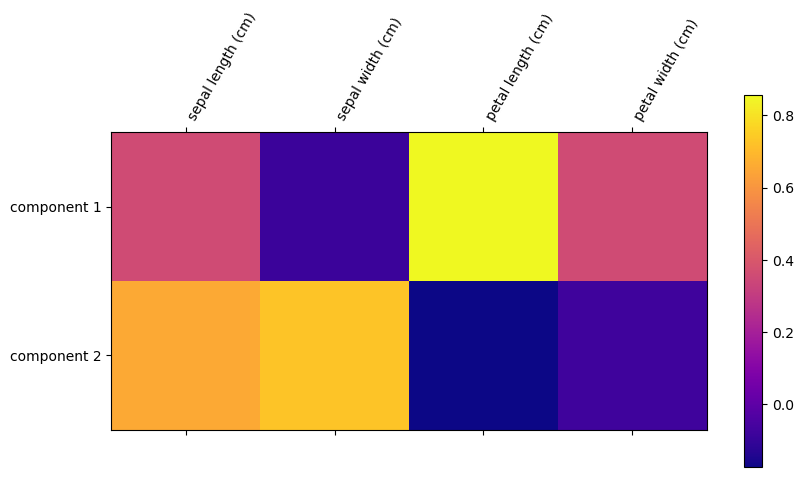

In [72]:
plt.matshow(pca.components_, cmap='plasma')
plt.yticks([0,1],['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)),iris.feature_names,
          rotation=60,ha='left')
plt.show()

In [73]:
pipe_iris = Pipeline([ ('scaler', StandardScaler()), ('logreg', LogisticRegression()) ])
pipe_iris.fit(X_train_pca, y_train)
print('使用管道模型的逻辑回归模型评分：{:.2f}'.format(
    pipeline.score(X_test_pca,y_test)))

使用管道模型的逻辑回归模型评分：0.29


In [74]:
param_grid = { 'scaler__with_mean': [True, False], 
              'logreg__C': [0.1, 1.0, 10.0], 'logreg__penalty': ['l1', 'l2'] }
grid_lr = GridSearchCV(pipe_iris,param_grid=param_grid, cv=5)
grid_lr.fit(X_train_pca, y_train)
print('使用管道模型的逻辑回归模型5折交叉验证评分：{:.2f}\n'.format(
    pipe_iris.score(pca.transform(X_test),y_test)))
print('交叉验证最高分:{:.2f}'.format(grid_lr.best_score_))
print('模型最优参数：{}'.format(grid_lr.best_params_))
print('测试集得分：{}'.format(grid_lr.score(X_test_pca,y_test)))

使用管道模型的逻辑回归模型5折交叉验证评分：0.95

交叉验证最高分:0.96
模型最优参数：{'logreg__C': 10.0, 'logreg__penalty': 'l2', 'scaler__with_mean': True}
测试集得分：0.9736842105263158


In [101]:
# best model
scaler = StandardScaler(with_mean = grid_lr.best_params_['scaler__with_mean']).fit(X)
X_scaled = scaler.transform(X)
be_lr = LogisticRegression(C = grid_lr.best_params_['logreg__C'],
                          penalty = grid_lr.best_params_['logreg__penalty'])
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X_scaled)
X_train, X_test, y_train, y_test=train_test_split(X_pca, iris.target)
be_lr.fit(X_train, y_train)
scores = cross_val_score(be_lr, X_pca,y, cv=5)
print('LogisticRegression交叉验证得分：\n{}'.format(scores))
print('LogisticRegression交叉验证平均分：{:.3f}'.format(scores.mean()))

LogisticRegression交叉验证得分：
[0.93333333 0.96666667 0.86666667 0.9        0.96666667]
LogisticRegression交叉验证平均分：0.927


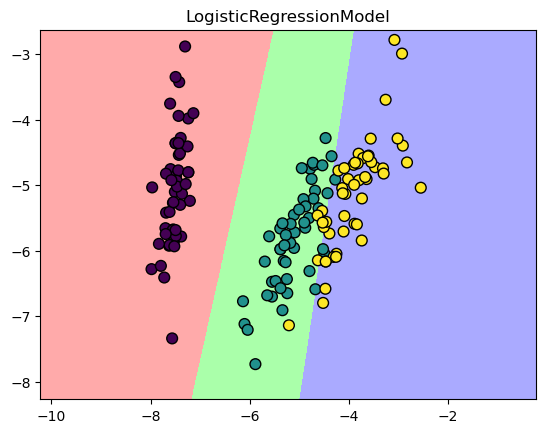

In [117]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train_pca[:, 0].min() - 7, X_train_pca[:, 0].max() - 4
y_min, y_max = X_train_pca[:, 1].min() - 7, X_train_pca[:, 1].max() - 4
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))
Z = be_lr.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=60)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("LogisticRegressionModel")

plt.show()

In [41]:
#只选取两个特征
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:,2:4]
y = iris.target
X_train, X_test, y_train, y_test=train_test_split(X, y)
X_train.shape
pipe_iris = Pipeline([ ('scaler', StandardScaler()), ('logreg', LogisticRegression()) ])
pipe_iris.fit(X_train, y_train)
print('使用管道模型的逻辑回归模型评分：{:.2f}'.format(
    pipeline.score(X_test,y_test)))

使用管道模型的逻辑回归模型评分：0.37
